#  3. Diagnostic et problématique

## 3.1 Analyse des consommations (avec visualisations et code Python)

###  Analyser les consommations globales et par bâtiment

Batiment
Ecole      1.195191e+06
Gymnase    8.024852e+05
Mairie     5.975953e+05
Name: Consommation (kWh), dtype: float64


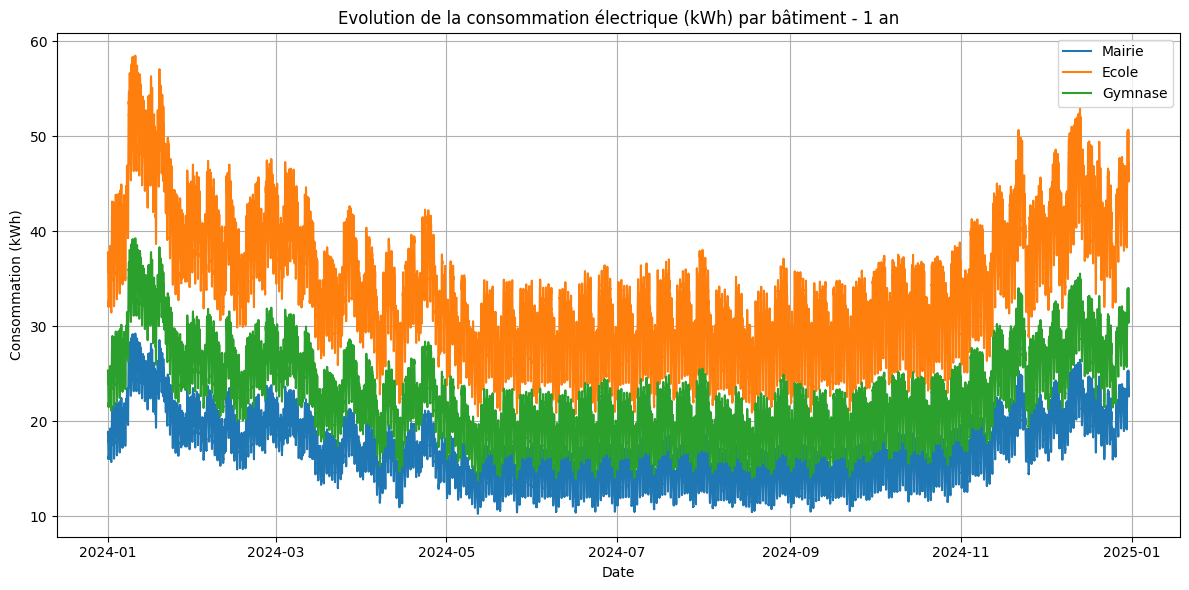

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données
df = pd.read_csv('Consommation_simulée_VilleVerte_ademe.csv', parse_dates=['Datetime'])

# Filtrer les données sur un an (du 1er janvier au 31 décembre)
start_date = '2024-01-01'
end_date = '2024-12-31'
df = df[(df['Datetime'] >= start_date) & (df['Datetime'] <= end_date)]

# Calcul consommation totale par bâtiment sur l'année
consommation_totale = df.groupby('Batiment')['Consommation (kWh)'].sum()
print(consommation_totale)

# Evolution de la consommation dans le temps par bâtiment
plt.figure(figsize=(12,6))
for batiment in df['Batiment'].unique():
    data = df[df['Batiment'] == batiment]
    data = data.groupby('Datetime')['Consommation (kWh)'].sum()
    plt.plot(data.index, data.values, label=batiment)

plt.xlabel('Date')
plt.ylabel('Consommation (kWh)')
plt.title('Evolution de la consommation électrique (kWh) par bâtiment - 1 an')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



L’analyse des données simulées sur l’ensemble de l’année 2024 met en lumière les tendances de consommation électrique des trois bâtiments publics de VilleVerte. Avec des valeurs ajustées sur une année complète, l’école enregistre une consommation totale d’environ 1 195 191 kWh, suivie du gymnase avec près de 802 485 kWh, et enfin la mairie avec environ 597 595 kWh. Ces écarts reflètent les différences de taille et d’usage entre les bâtiments : l’école, en tant que plus grand site et avec des horaires scolaires réguliers, consomme naturellement davantage, tandis que le gymnase montre des pics liés aux activités sportives et à l’éclairage intensif du soir et des week-ends. La mairie, plus stable et moins sollicitée, enregistre une consommation continue mais modérée, cohérente avec ses fonctions administratives et ses équipements vieillissants.

Le graphique d’évolution de la consommation montre des cycles journaliers et saisonniers, avec des hausses marquées au début et en fin d’année (hiver) et des baisses durant l’été, illustrant l’impact des besoins de chauffage et d’éclairage sur les consommations. Cette observation conforte l’hypothèse selon laquelle la mise en place d’un système de pilotage énergétique automatisé pourrait permettre de mieux aligner les périodes de chauffe et d’éclairage avec l’occupation réelle, et ainsi d’éviter les surconsommations inutiles.

L’analyse confirme également l’importance d’intervenir sur l’école, qui reste le poste le plus énergivore, en envisageant des actions telles que l’amélioration de l’isolation, la régulation thermique ou le remplacement des équipements énergétiques. Enfin, l’absence actuelle d’outils prédictifs et de régulation expose la commune à des dépassements de consommation non anticipés et à des dépenses potentiellement évitables, d’autant plus problématiques dans un contexte budgétaire contraint et face aux exigences croissantes de transition énergétique.

### Comparaison directe École vs Mairie et détection des pics

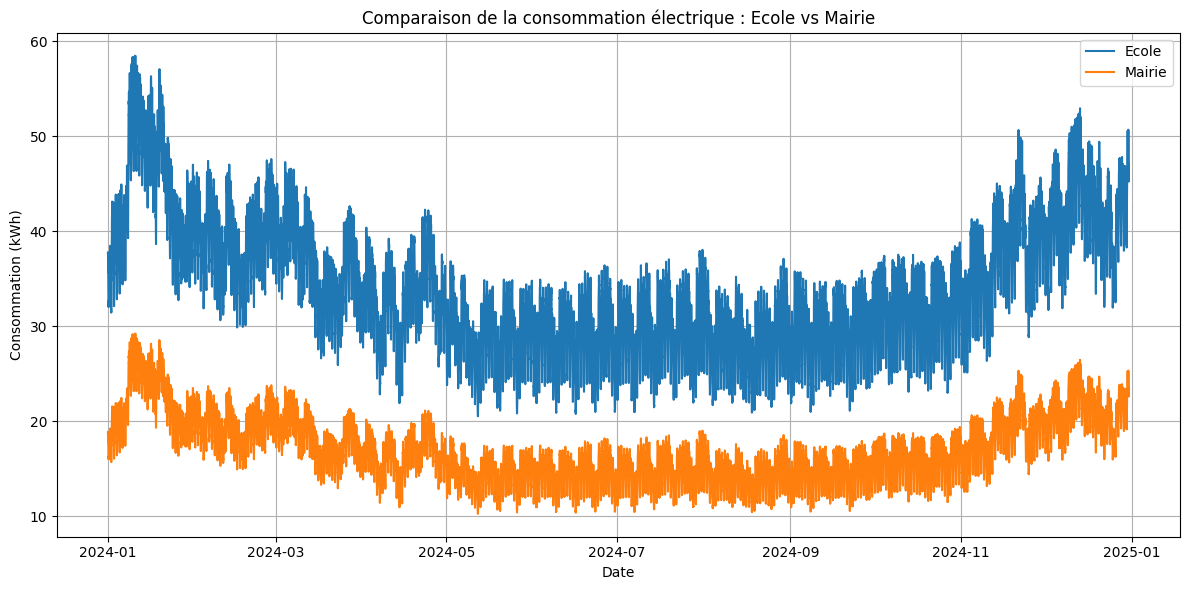

Consommation maximale par bâtiment (kWh) :
Batiment
Ecole      58.46680
Gymnase    39.25628
Mairie     29.23340
Name: Consommation (kWh), dtype: float64


In [9]:
# Comparaison de l'évolution école vs mairie
plt.figure(figsize=(12,6))

for batiment in ['Ecole', 'Mairie']:
    data = df[df['Batiment'] == batiment]
    data = data.groupby('Datetime')['Consommation (kWh)'].sum()
    plt.plot(data.index, data.values, label=batiment)

plt.xlabel('Date')
plt.ylabel('Consommation (kWh)')
plt.title('Comparaison de la consommation électrique : Ecole vs Mairie')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Détection des pics : consommation maximale par bâtiment
pics = df.groupby('Batiment')['Consommation (kWh)'].max()
print("Consommation maximale par bâtiment (kWh) :")
print(pics)


L’analyse comparée de la consommation électrique entre l’école et la mairie de VilleVerte sur l’année 2024 révèle des écarts significatifs à la fois en volume et en dynamique. Comme le montre le graphique de comparaison, l’école enregistre une consommation nettement plus élevée, atteignant des pics d’environ 58,5 kWh par quart d’heure, contre environ 29,2 kWh pour la mairie. Cette différence, bien que mesurée en valeur absolue, reste cohérente avec les différences de superficie et d’usage : l’école, dotée de nombreux locaux et d’horaires scolaires réguliers, présente une consommation soutenue et des hausses marquées aux périodes de rentrée, tandis que la mairie affiche une courbe plus plate et modérée, associée à ses usages administratifs.

Les courbes mettent en évidence des cycles bien marqués sur l’année, avec des hausses prononcées à l’école le matin et en fin d’après-midi, caractéristiques des périodes scolaires, et une consommation plus régulière mais plus faible à la mairie. Ces variations laissent penser que l’école reste particulièrement exposée à des surconsommations ponctuelles (chauffage maintenu en dehors des horaires d’ouverture, éclairage prolongé), ce qui justifie l’intérêt d’un module prédictif et d’un système de pilotage énergétique intelligent.

L’identification des consommations maximales par bâtiment (école : 58,5 kWh, gymnase : 39,3 kWh, mairie : 29,2 kWh) met en lumière des pics pouvant correspondre à des événements spécifiques ou à des anomalies temporaires. Ces constats confirment que VilleVerte, dans sa configuration actuelle, ne dispose d’aucun système dynamique de suivi ni d’alerte énergétique, la laissant exposée à des consommations imprévues et à des dépenses évitables, d’autant plus critiques dans un contexte budgétaire contraint et face aux exigences climatiques.

## 3.2 Manques actuels identifiés

3.2 Manques actuels identifiés
L’analyse détaillée des consommations simulées à VilleVerte sur une année complète a mis en évidence plusieurs lacunes majeures dans la gestion énergétique actuelle. Tout d’abord, la commune ne dispose d’aucun système de suivi automatisé ni d’outil d’analyse prédictive, ce qui empêche l’anticipation des besoins et l’adaptation aux pics d’activité identifiés, tels que les hausses de consommation marquées à l’école pendant les périodes scolaires ou les pics ponctuels au gymnase. Les relevés de consommation se font manuellement et de façon sporadique, sans dispositif permettant d’identifier en temps réel les dérives ou les anomalies de consommation. De plus, il n’existe aucun tableau de bord centralisé regroupant les indicateurs énergétiques des différents bâtiments publics, ce qui limite considérablement la capacité à évaluer et optimiser leur performance globale.

Enfin, les outils décisionnels restent quasi inexistants : les choix en matière de consommation énergétique s’appuient sur des budgets historiques, sans corrélation avec les besoins réels, ni simulation d’impact économique ou environnemental. Cette gouvernance énergétique à vue expose VilleVerte à des dépenses non maîtrisées et à une faible résilience face aux variations de prix ou aux nouvelles contraintes climatiques. La nécessité d’un pilotage intelligent et d’un système prédictif apparaît ainsi comme une priorité stratégique pour la commune.

## 3.3 Problématique confirmée

Au vu de ces constats, la problématique initiale se confirme et se précise :

« Comment permettre à une collectivité telle que VilleVerte de mieux piloter ses consommations énergétiques et son empreinte carbone, malgré l’absence d’outils prédictifs et de suivi, afin d’optimiser les dépenses, réduire l’impact environnemental et renforcer la résilience locale ? »

L’analyse des données simulées sur l’année complète a mis en évidence un double besoin crucial pour VilleVerte : d’une part, la nécessité d’anticiper et de piloter les consommations énergétiques à l’aide d’un module prédictif simple, accessible et adapté aux ressources limitées de la commune. Les cycles journaliers et saisonniers identifiés, ainsi que les pics de consommation à l’école et au gymnase, illustrent la pertinence d’un outil permettant d’ajuster les usages en fonction de l’occupation réelle et des besoins réels.

D’autre part, la capacité à mesurer et simuler l’impact carbone des décisions énergétiques est aujourd’hui inexistante. Cette faiblesse prive VilleVerte non seulement de la possibilité d’évaluer les bénéfices environnementaux de ses actions, mais également de se positionner comme une collectivité proactive et responsable face aux exigences réglementaires et climatiques.

L’intégration d’une plateforme IA combinant ces deux fonctionnalités – prédiction énergétique et évaluation carbone – apparaît ainsi comme une solution indispensable et stratégique. Elle permettrait à VilleVerte de sortir d’une logique de gestion réactive et coûteuse pour aller vers une gouvernance énergétique intelligente, durable et résiliente, capable de répondre aux enjeux budgétaires, environnementaux et réglementaires.